# Home Credit Default Risk

### Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datapath = 'home-credit-default-risk/data'

In [3]:
app_train = pd.read_csv(datapath + r'/application_train.csv')
app_test = pd.read_csv(datapath + r'/application_test.csv')

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


After the loading of the main dataset, we are going to load all the secondary data and merge it to the main dataframes.

In [5]:
print(app_train.shape[0])
print(app_test.shape[0])

307511
48744


## Analyzing the app_train dataset

In [6]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Here is the distribution of the **TARGET** label.

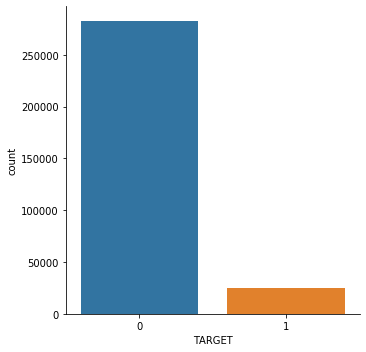

In [8]:
sns.catplot(x='TARGET', kind='count', data=app_train)

As we can see the data we have for the training is **unbalanced**, this means that most of the data points have a certain TARGET label, in our case 0.

In [9]:
round((app_train['TARGET']==0).sum()*100/app_train.shape[0], 2)

91.93

More than 91% of the people don't get a loan.

### Analyzing single features

The next step consists in analyzing the features present in the dataset and cleaning eventual anomalies.

#### NAME_CONTRACT_TYPE

In [10]:
app_train['NAME_CONTRACT_TYPE'].describe()

count         307511
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object

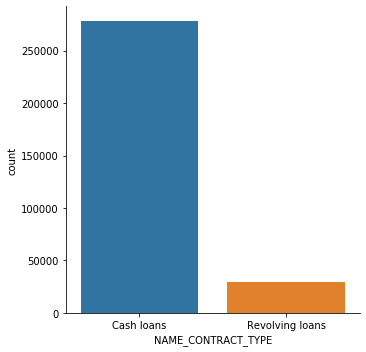

In [11]:
sns.catplot(x='NAME_CONTRACT_TYPE', kind='count', data=app_train)

#### CODE_GENDER

In [12]:
app_train['CODE_GENDER'].describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

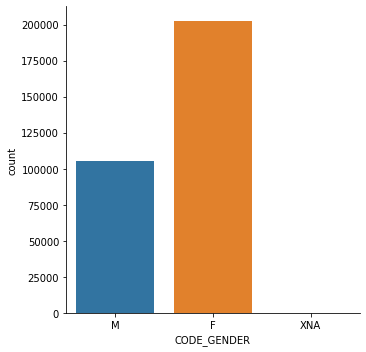

In [13]:
sns.catplot(x='CODE_GENDER', kind='count', data=app_train)

In [14]:
sum(app_train['CODE_GENDER']=='XNA')

4

As we can see there are 4 clients with no gender.

In [15]:
app_train.loc[app_train['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'

In [16]:
sum(app_train['CODE_GENDER']=='XNA')

0

#### FLAG_OWN_CAR and FLAG_OWN_REALTY

In [17]:
app_train['FLAG_OWN_CAR'].describe()

count     307511
unique         2
top            N
freq      202924
Name: FLAG_OWN_CAR, dtype: object

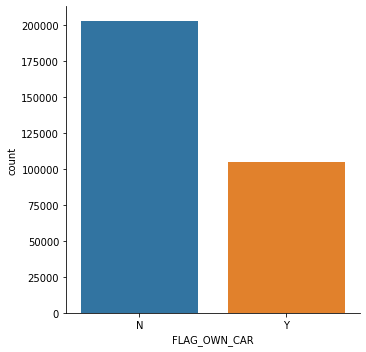

In [18]:
sns.catplot(x='FLAG_OWN_CAR', kind='count', data=app_train)

In [19]:
app_train['FLAG_OWN_REALTY'].describe()

count     307511
unique         2
top            Y
freq      213312
Name: FLAG_OWN_REALTY, dtype: object

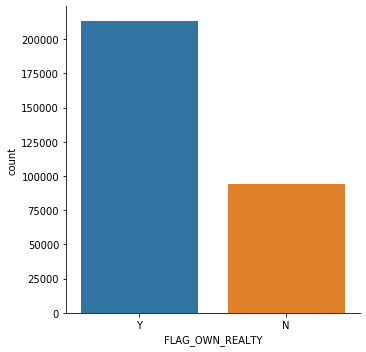

In [20]:
sns.catplot(x='FLAG_OWN_REALTY', kind='count', data=app_train)

#### CNT_CHILDREN

In [21]:
app_train['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

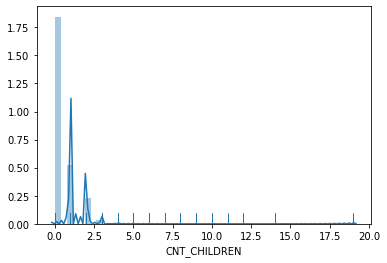

In [22]:
sns.distplot(app_train['CNT_CHILDREN'], rug=True)

In [23]:
# checking outliers
q = app_train['CNT_CHILDREN'].quantile(.99)
print(q)
print("There are ", (app_train['CNT_CHILDREN'] > q).sum(), " clients with more than ", int(q), "children")

3.0
There are  555  clients with more than  3 children


In [24]:
app_train[app_train['CNT_CHILDREN'] > 10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
34545,140032,1,Cash loans,M,Y,N,11,315000.0,1007761.5,38515.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
80948,193853,0,Cash loans,F,N,Y,12,337500.0,746280.0,59094.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
171125,298322,0,Revolving loans,F,N,Y,12,225000.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
176011,303956,0,Cash loans,M,Y,Y,14,225000.0,1085058.0,55530.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
183878,313127,0,Cash loans,F,Y,N,14,45000.0,810000.0,23814.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
267998,410527,0,Cash loans,F,N,N,14,54000.0,604152.0,25596.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


Since the outliers seem to be quite a lot and the maximum value is not an exagerate number, we will keep them as they are.

#### NAME_TYPE_SUITE and NAME_INCOME_TYPE

In [25]:
app_train['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

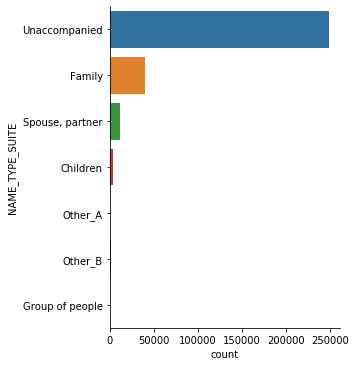

In [26]:
sns.catplot(y='NAME_TYPE_SUITE', kind='count', data=app_train)

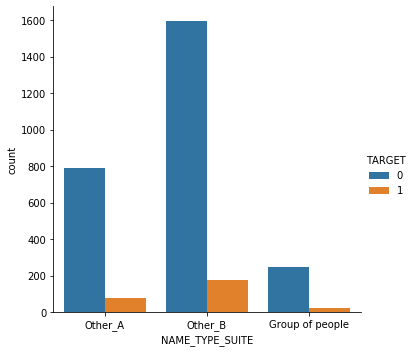

In [27]:
sns.catplot(x='NAME_TYPE_SUITE', data=app_train.loc[app_train['NAME_TYPE_SUITE'].isin(['Other_A', 'Other_B', 'Group of people'])] , kind='count', hue='TARGET')

In [28]:
cat = app_train['NAME_TYPE_SUITE'].value_counts()[:3].index.tolist()
app_train.loc[~app_train['NAME_TYPE_SUITE'].isin(cat), 'NAME_TYPE_SUITE'] = 'Other'
app_test.loc[~app_test['NAME_TYPE_SUITE'].isin(cat), 'NAME_TYPE_SUITE'] = 'Other'

In [29]:
app_train['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Other'],
      dtype=object)

In [30]:
app_train['NAME_INCOME_TYPE'].describe()

count      307511
unique          8
top       Working
freq       158774
Name: NAME_INCOME_TYPE, dtype: object

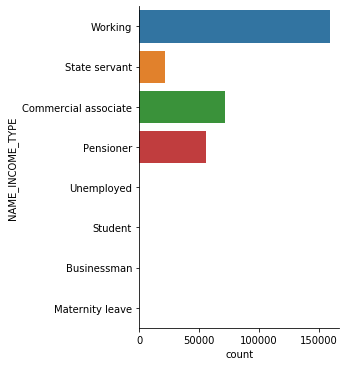

In [31]:
sns.catplot(y='NAME_INCOME_TYPE', kind='count', data=app_train)

#### DAYS_EMPLOYED

In [32]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

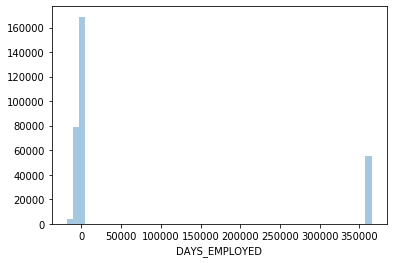

In [33]:
sns.distplot(app_train['DAYS_EMPLOYED'], kde=False)

In [34]:
sum(app_train['DAYS_EMPLOYED']>0)

55374

As we can see, there are a lot of row where the value in DAYS_EMPLOYED is over 1000 years. We are going to substitute that value with NaN values, since we do not know what they actually represent and substituting with the median could be an error. We will also create a new column to keep track of the values we converted.

In [35]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] > 0
# do the same for the test set
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] > 0

In [36]:
app_train.loc[app_train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = np.nan
app_test.loc[app_test['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = np.nan

Here it is the new distribution

C:\Users\paolo\Anaconda3\envs\data_science\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\paolo\Anaconda3\envs\data_science\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


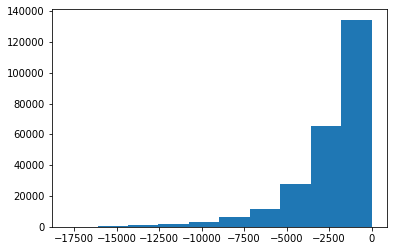

In [37]:
plt.hist(data=app_train, x='DAYS_EMPLOYED')
plt.show()

#### Columns to drop

Looking at the distribution of the columns on kaggle, there are a lot of them with 100% distribution on a single value. This type of features doesn't give any type of information to any model, so it is more useful to drop them.

In [38]:
cols_to_drop = ['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'REG_REGION_NOT_LIVE_REGION', 
                'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5']
app_train.drop(columns=cols_to_drop, inplace=True)
app_test.drop(columns=cols_to_drop, inplace=True)

#### OCCUPATION_TYPE

In [39]:
app_train['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

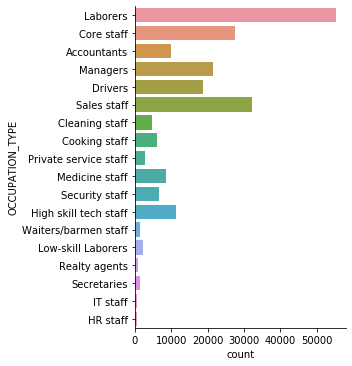

In [40]:
sns.catplot(y='OCCUPATION_TYPE', kind='count', data=app_train)

In [41]:
count = app_train['OCCUPATION_TYPE'].isna().sum()
print("Missing values are {}. {}% of the total.".format(count, round(count/app_train.shape[0], 3)))

Missing values are 96391. 0.313% of the total.


In [42]:
app_train.loc[app_train['OCCUPATION_TYPE'].isna(), ['OCCUPATION_TYPE']] = 'Other'
app_test.loc[app_test['OCCUPATION_TYPE'].isna(), ['OCCUPATION_TYPE']] = 'Other'

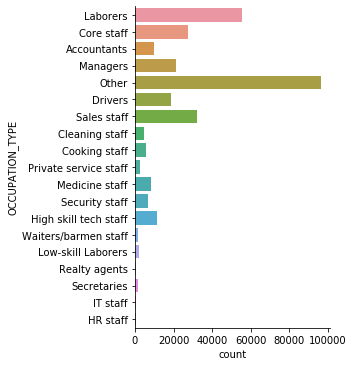

In [43]:
sns.catplot(y='OCCUPATION_TYPE', kind='count', data=app_train)

#### ORGANIZATION_TYPE

In [44]:
app_train['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [45]:
app_train['ORGANIZATION_TYPE'].isna().sum()

0

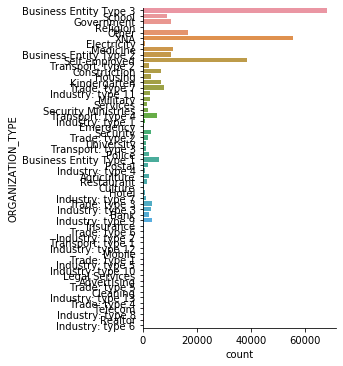

In [46]:
sns.catplot(y='ORGANIZATION_TYPE', kind='count', data=app_train)

To avoid overfitting in future trainin, we are going to aggregate less frequent values into a single category 'Other'

In [47]:
cat = app_train['ORGANIZATION_TYPE'].value_counts()
cat = cat[cat > 1000].index.tolist()
app_train.loc[~app_train['ORGANIZATION_TYPE'].isin(cat), 'ORGANIZATION_TYPE'] = 'Other'
app_test.loc[~app_test['ORGANIZATION_TYPE'].isin(cat), 'ORGANIZATION_TYPE'] = 'Other'

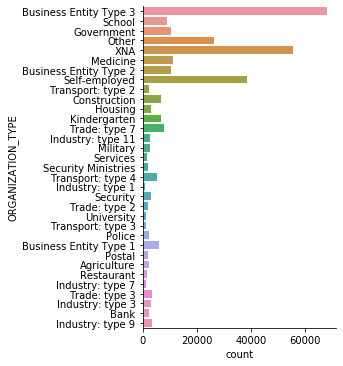

In [48]:
sns.catplot(y='ORGANIZATION_TYPE', kind='count', data=app_train)

#### FONDKAPREMONT_MODE

In [49]:
app_train['FONDKAPREMONT_MODE'].describe()

count                97216
unique                   4
top       reg oper account
freq                 73830
Name: FONDKAPREMONT_MODE, dtype: object

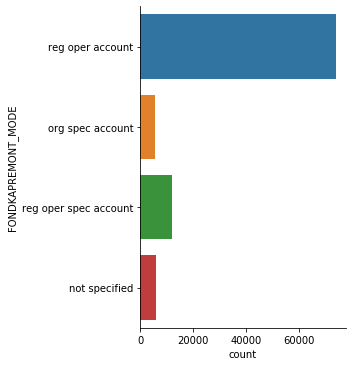

In [50]:
sns.catplot(y='FONDKAPREMONT_MODE', kind='count', data=app_train)

In [51]:
app_train['FONDKAPREMONT_MODE'].isna().sum()

210295

In [52]:
app_train.loc[app_train['FONDKAPREMONT_MODE'].isna(), 'FONDKAPREMONT_MODE'] = 'not specified'
app_test.loc[app_test['FONDKAPREMONT_MODE'].isna(), 'FONDKAPREMONT_MODE'] = 'not specified'

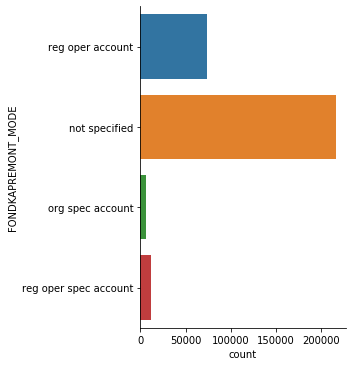

In [53]:
sns.catplot(y='FONDKAPREMONT_MODE', kind='count', data=app_train)

#### HOUSETYPE_MODE

In [54]:
app_train['HOUSETYPE_MODE'].describe()

count             153214
unique                 3
top       block of flats
freq              150503
Name: HOUSETYPE_MODE, dtype: object

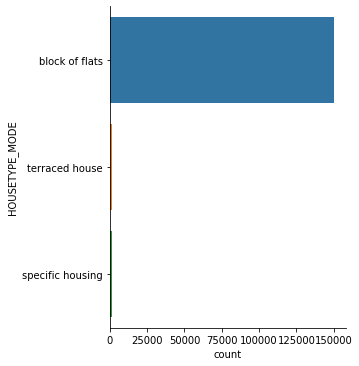

In [55]:
sns.catplot(y='HOUSETYPE_MODE', kind='count', data=app_train)

In [56]:
app_train['HOUSETYPE_MODE'].isna().sum()

154297

Since there isn't a 'not specified' value type, we will deal with NA later in the label encoding.

#### WALLSMATERIAL_MODE

In [57]:
app_train['WALLSMATERIAL_MODE'].describe()

count     151170
unique         7
top        Panel
freq       66040
Name: WALLSMATERIAL_MODE, dtype: object

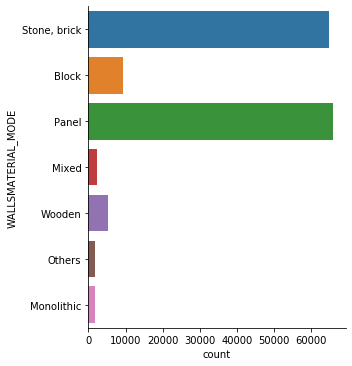

In [58]:
sns.catplot(y='WALLSMATERIAL_MODE', kind='count', data=app_train)

In [59]:
app_train['WALLSMATERIAL_MODE'].isna().sum()

156341

In [60]:
app_train.loc[app_train['WALLSMATERIAL_MODE'].isna(), 'WALLSMATERIAL_MODE'] = 'Others'
app_test.loc[app_test['WALLSMATERIAL_MODE'].isna(), 'WALLSMATERIAL_MODE'] = 'Others'

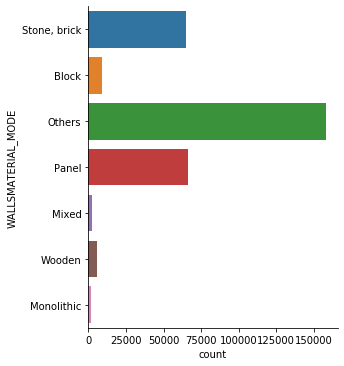

In [61]:
sns.catplot(y='WALLSMATERIAL_MODE', kind='count', data=app_train)

#### EMERGENCYSTATE_MODE

In [62]:
app_train['EMERGENCYSTATE_MODE'].describe()

count     161756
unique         2
top           No
freq      159428
Name: EMERGENCYSTATE_MODE, dtype: object

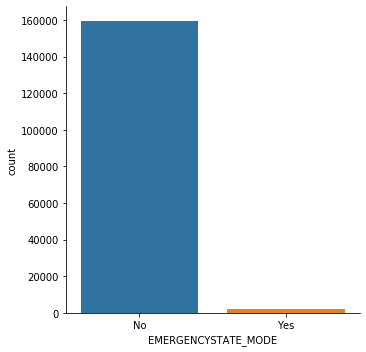

In [63]:
sns.catplot(x='EMERGENCYSTATE_MODE', kind='count', data=app_train)

## Categorical features and Label encoding

Let's see how many features in the dataset are categorical, that means that are not integers or floats.

In [64]:
def get_cat_features(df):
    cat_features = {}
    for col in df.columns:
        if df[col].dtype == object:
            cat_features[col] = df[col].nunique()

    cat_features = pd.DataFrame.from_dict(cat_features, columns=['classes'], orient='index')
    return cat_features

In [65]:
cat_features_train = get_cat_features(app_train)
cat_features_train

,classes
NAME_CONTRACT_TYPE,2
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,4
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,19


The same analysis can be performed on the test dataset.

In [66]:
cat_features_test = get_cat_features(app_test)
cat_features_test

,classes
NAME_CONTRACT_TYPE,2
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,4
NAME_INCOME_TYPE,7
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,5
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,19


In [67]:
set(cat_features_test.index == cat_features_train.index)

{True}

As we can see the train and the test dataset have the same variables, but with different number of classes.

In [68]:
print("There are %d categorical variables" % len(cat_features_train))

There are 16 categorical variables


Now we need to convert all the categorical features into numbers, otherwise most models won't be able to deal with them.  
We have 2 ways to do it:
1. via **Label Encoding**: encoding each class into an integer
2. via **one-hot Encoding**: each class will be converted into a new column in the dataframe.

The first method is useful only when a variable has 1 or 2 classes but it is not good for encoding variables with more classes.

So, first thing, we are going to convert each variable with max 2 classes through Label Encoding.

In [69]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [70]:
def label_encoding(df, cat_features):
    for index, row in cat_features.iterrows():
        if row[0] <= 2:
            df[index] = LE.fit_transform(df[index].to_list())

In [71]:
label_encoding(app_train, cat_features_train)
label_encoding(app_test, cat_features_test)

In [72]:
print("There are %d categorical variables in app_train" % len(get_cat_features(app_train)))
print("There are %d categorical variables in app_test" % len(get_cat_features(app_test)))

There are 11 categorical variables in app_train
There are 11 categorical variables in app_test


For the categorical variable with more tha 2 classes we are going to perform, instead, one-hot encoding using the **pd.get_dummies()** function.

In [73]:
app_train = pd.get_dummies(app_train, drop_first=True, dummy_na=True)
app_test = pd.get_dummies(app_test, drop_first=True, dummy_na=True)

The *drop_first=True* attribute drops one column for each categorical feature to avoid multicollinearity; while with *dummy_na=True* we create a new column to indicate the rows with NaN values since this information can be useful to the model.

In [74]:
print("There are %d categorical variables in app_train" % len(get_cat_features(app_train)))
print("There are %d categorical variables in app_test" % len(get_cat_features(app_test)))

There are 0 categorical variables in app_train
There are 0 categorical variables in app_test


In [75]:
print(app_train.shape)
print(app_test.shape)

(307511, 208)
(48744, 205)


Now the train and test datasets have different number of columns due to the encoding, so we need to keep just the common columns between the 2 dataframes.

In [76]:
cat1 = set(app_train.columns)
cat2 = set(app_test.columns)
inter = cat2.difference(cat1)
inter

set()

In [77]:
# we need to keep the target column since we will need it for the training
target = app_train['TARGET']
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
app_train['TARGET'] = target

In [78]:
print(app_train.shape)
print(app_test.shape)

(307511, 206)
(48744, 205)


## Analyzing installments_payments dataset

In [79]:
payments = pd.read_csv(datapath + r'/installments_payments.csv')

In [80]:
payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


Just by taking a look at the *describe* table we can see that everything is fine with this dataset, so we can move on analyzing another one.

## Merging train and test

From now on, we will want to modify app_train and app_test together. For this reason it is useful to merge them. But first we need to create a column to distinguish them.

In [81]:
app_train['train'] = 1
app_test['train'] = 0
# we also need to add the TARGET column to data_test
app_test['TARGET'] = np.nan

In [82]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_nan,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,TARGET,dataset
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,0,1,train
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,train
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,1,0,0,1,0,0,0,0,0,train
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,1,0,0,1,0,0,0,0,0,train
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,1,0,0,1,0,0,0,0,0,train


In [83]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_nan,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,dataset,TARGET
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0,1,0,0,test,NaN
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,1,0,0,1,0,0,0,0,test,NaN
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,1,0,0,1,0,0,0,0,test,NaN
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,1,0,0,0,test,NaN
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,1,0,0,1,0,0,0,0,test,NaN


In [84]:
app = app_train.append(app_test, ignore_index=False, sort=True)
app.shape

(356255, 207)

## Repeating the data-preprocessing for all the other datasets

In [85]:
credit_card_balance = pd.read_csv(datapath + r'/credit_card_balance.csv')

In [86]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [87]:
credit_card_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [88]:
credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].describe()

count    3.090496e+06
mean     5.961325e+03
std      2.822569e+04
min     -6.827310e+03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.115000e+06
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: float64

C:\Users\paolo\Anaconda3\envs\data_science\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\paolo\Anaconda3\envs\data_science\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


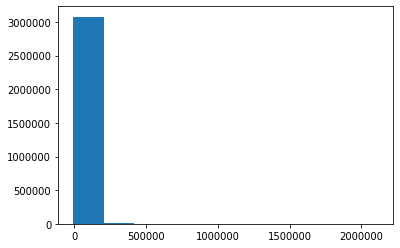

In [89]:
plt.hist(data=credit_card_balance, x='AMT_DRAWINGS_ATM_CURRENT')
plt.show()

In [90]:
sum(credit_card_balance['AMT_DRAWINGS_ATM_CURRENT']==0.0)

2665718

In [91]:
(credit_card_balance['NAME_CONTRACT_STATUS']).describe()

count     3840312
unique          7
top        Active
freq      3698436
Name: NAME_CONTRACT_STATUS, dtype: object

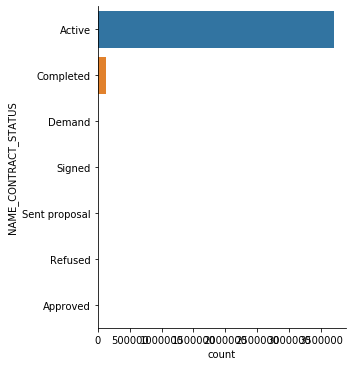

In [92]:
sns.catplot(y='NAME_CONTRACT_STATUS', kind='count', data=credit_card_balance)
plt.show()

In [93]:
bureau_balance = pd.read_csv(datapath + r'/bureau_balance.csv')

In [94]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [95]:
bureau_balance['STATUS'].describe()

count     27299925
unique           8
top              C
freq      13646993
Name: STATUS, dtype: object

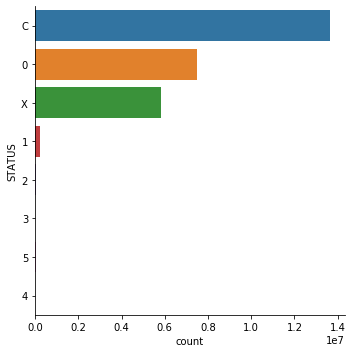

In [97]:
sns.catplot(y='STATUS', kind='count', data=bureau_balance)
plt.show()

In [98]:
sum(bureau_balance['STATUS']=='1')

242347

In [99]:
sum(bureau_balance['STATUS']=='2')

23419

In [100]:
sum(bureau_balance['STATUS']=='3')

8924

In [101]:
sum(bureau_balance['STATUS']=='4')

5847

In [102]:
sum(bureau_balance['STATUS']=='5')

62406

In [103]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [104]:
bureau = pd.read_csv(datapath + r'/bureau.csv')

In [105]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [106]:
bureau['CREDIT_ACTIVE'].describe()

count     1716428
unique          4
top        Closed
freq      1079273
Name: CREDIT_ACTIVE, dtype: object

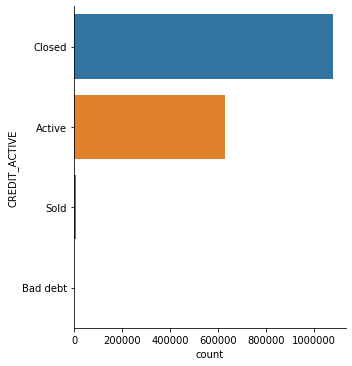

In [107]:
sns.catplot(y ='CREDIT_ACTIVE', kind='count', data=bureau)
plt.show()

In [108]:
sum(bureau['CREDIT_ACTIVE'] == 'Bad debt')

21

In [109]:
bureau['CREDIT_CURRENCY'].describe()

count        1716428
unique             4
top       currency 1
freq         1715020
Name: CREDIT_CURRENCY, dtype: object

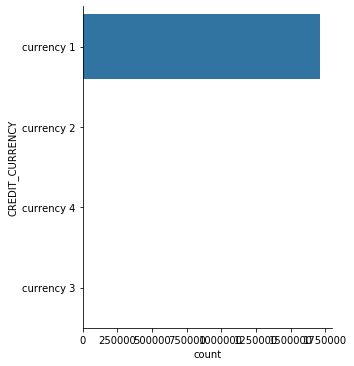

In [110]:
sns.catplot(y='CREDIT_CURRENCY', kind='count', data=bureau)
plt.show()

In [111]:
bureau['CREDIT_CURRENCY'].isna().sum()

0

In [112]:
sum(bureau['CREDIT_CURRENCY']=='currency 2')

1224

In [113]:
sum(bureau['CREDIT_CURRENCY']=='currency 3')

174

In [114]:
sum(bureau['CREDIT_CURRENCY']=='currency 4')

10

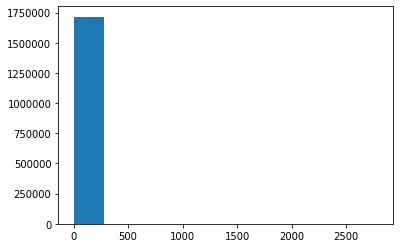

In [115]:
plt.hist(data=bureau,x='CREDIT_DAY_OVERDUE')
plt.show()

In [116]:
bureau['CNT_CREDIT_PROLONG'].describe()

count    1.716428e+06
mean     6.410406e-03
std      9.622391e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+00
Name: CNT_CREDIT_PROLONG, dtype: float64

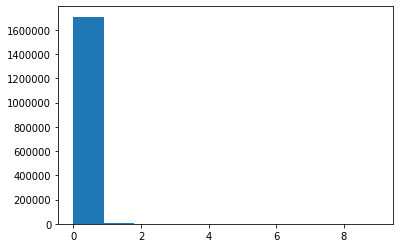

In [117]:
plt.hist(data=bureau,x='CNT_CREDIT_PROLONG')
plt.show()

In [118]:
bureau['CREDIT_TYPE'].describe()

count             1716428
unique                 15
top       Consumer credit
freq              1251615
Name: CREDIT_TYPE, dtype: object

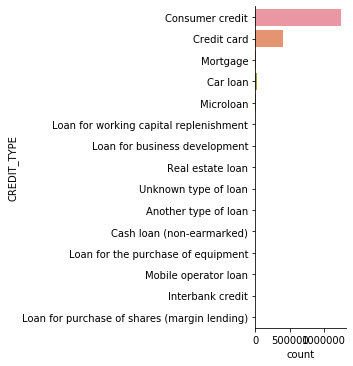

In [119]:
sns.catplot(y='CREDIT_TYPE', kind='count', data=bureau)
plt.show()

In [120]:
sum(bureau['CREDIT_TYPE']=='Mortgage')

18391

In [121]:
sum(bureau['CREDIT_TYPE']=='Car loan')

27690

In [122]:
sum(bureau['CREDIT_TYPE']=='Microloan')

12413

In [123]:
sum(bureau['CREDIT_TYPE']=='Loan for working capital replenishment')

469

In [124]:
sum(bureau['CREDIT_TYPE']=='Loan for business development')

1975

In [125]:
sum(bureau['CREDIT_TYPE']=='Real estate loan')

27

In [126]:
sum(bureau['CREDIT_TYPE']=='Unknown type of loan')

555

In [127]:
sum(bureau['CREDIT_TYPE']=='Another type of loan')

1017

In [128]:
sum(bureau['CREDIT_TYPE']=='Cash loan (non-earmarked)')

56

In [129]:
bureau['AMT_CREDIT_SUM_LIMIT'].describe()

count    1.124648e+06
mean     6.229515e+03
std      4.503203e+04
min     -5.864061e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.705600e+06
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64

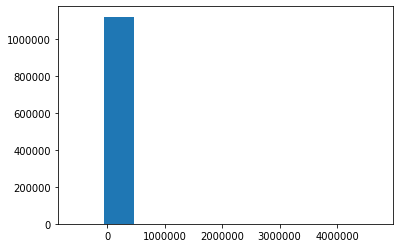

In [130]:
plt.hist(data=bureau,x='AMT_CREDIT_SUM_LIMIT')
plt.show()

In [131]:
bureau['AMT_ANNUITY'].describe()

count    4.896370e+05
mean     1.571276e+04
std      3.258269e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.350000e+04
max      1.184534e+08
Name: AMT_ANNUITY, dtype: float64

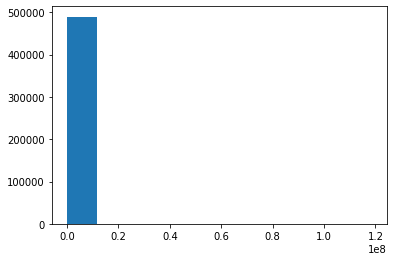

In [132]:
plt.hist(data=bureau,x='AMT_ANNUITY')
plt.show()

## Data pre-processing

Before merging all the datasets we have, we want to perform some data pre-processing, such as handling missing values or handling categorical variables, such that when we proceed with the feature engineering process the data is already cleaned.

In [ ]:
# loading data
# bureau = pd.read_csv(datapath + r'/bureau.csv')
# bureau_balance = pd.read_csv(datapath + r'/bureau_balance.csv')
# cc_balance = pd.read_csv(datapath + r'/credit_card_balance.csv')
# payments = pd.read_csv(datapath + r'/installments_payments.csv')
# pos_cash = pd.read_csv(datapath + r'/POS_CASH_balance.csv')
# prev_app = pd.read_csv(datapath + r'/previous_application.csv')

In [ ]:
# datasets = [app, bureau, bureau_balance, cc_balance, payments, pos_cash, prev_app]

### Inspecting missing values

One of the first things to do during the data analysis process is to check the missing values in the dataset and the relative amount and percentages.

In [ ]:
def check_missing_values(df):
    cols = df.columns
    nan_df = pd.DataFrame(columns=['n_nan', 'perc_nan'])
    
    for col in cols:
        n_nan = pd.isna(df[col]).sum()
        perc = round((n_nan / df.shape[0])*100, 2)
        s = pd.Series({'n_nan': n_nan, 'perc_nan': perc} ,name=col)
        nan_df = nan_df.append(s)
        
    return nan_df.sort_values(by=['n_nan'], ascending=False)

For each loaded dataset we are going to check the missing values and remove the columns with an high percentage of Nan, 70% in this case.

In [ ]:
# for d in datasets:
#     # check the number of missing values for each column
#     nan_values = check_missing_values(d)
#     # drop the columns with a percentage of missing values over 70%
#     cols_to_drop = list(nan_values[nan_values['perc_nan']>=70].index)
#     d.drop(columns=cols_to_drop, inplace=True)

## Merging other datasets with *featuretools*

In [139]:
import featuretools as ft
import featuretools.variable_types as vtypes

# creating a new entityset
es = ft.EntitySet(id = 'clients')

In [133]:
col_bureau_1 = set(bureau.columns)
col_bb_1 = set(bureau_balance.columns)
col_cc_1 = set(credit_card_balance.columns)

In [134]:
bureau = pd.get_dummies(bureau, drop_first=True, dummy_na=True)

In [135]:
credit_card_balance = pd.get_dummies(credit_card_balance, drop_first=True, dummy_na=True)

In [136]:
bureau_balance = pd.get_dummies(bureau_balance, drop_first=True, dummy_na=True)

In [137]:
col_bureau_2 = set(bureau.columns)
col_bb_2 = set(bureau_balance.columns)
col_cc_2 = set(credit_card_balance.columns)

In [138]:
col_b_diff = col_bureau_2.difference(col_bureau_1)
col_bb_diff = col_bb_2.difference(col_bb_1)
col_cc_diff = col_cc_2.difference(col_cc_1)

In [141]:
vt_b = {}
vt_bb = {}
vt_cc = {}
for var in col_b_diff:
    vt_b[var] = vtypes.Categorical
for var in col_bb_diff:
    vt_bb[var] = vtypes.Categorical
for var in col_cc_diff:
    vt_cc[var] = vtypes.Categorical

#### Creating entities

In [142]:
es = es.entity_from_dataframe(entity_id='clients', dataframe=app, index='SK_ID_CURR')

In [143]:
es = es.entity_from_dataframe(entity_id='bureau', dataframe=bureau, index='SK_ID_BUREAU', variable_types=vt_b)

In [144]:
es = es.entity_from_dataframe(entity_id='bureau_balance', dataframe=bureau_balance,
                             make_index=True, index='BB_ID', variable_types=vt_bb)

In [145]:
es = es.entity_from_dataframe(entity_id='cc_balance', dataframe=credit_card_balance, 
                              make_index=True, index='CC_BALANCE_ID', variable_types=vt_cc)

##### To-Do

In [19]:
es = es.entity_from_dataframe(entity_id='prev_app', dataframe=prev_app, index='SK_ID_PREV')

In [20]:
es = es.entity_from_dataframe(entity_id='pos_cash_balance', dataframe=pos_cash, 
                              make_index=True, index='BALANCE_ID')

In [21]:
es = es.entity_from_dataframe(entity_id='payments', dataframe=payments, 
                              make_index=True, index='PAYMENT_ID')

#### Creating relationships between entities

In [146]:
bureau_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['bureau']['SK_ID_CURR'])
cc_balance_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['cc_balance']['SK_ID_CURR'])
bureau_balance_r = ft.Relationship(es['bureau']['SK_ID_BUREAU'],
                          es['bureau_balance']['SK_ID_BUREAU'])

In [ ]:
prev_app_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['prev_app']['SK_ID_CURR'])
pos_cash_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['pos_cash_balance']['SK_ID_CURR'])
payments_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['payments']['SK_ID_CURR'])

In [147]:
es = es.add_relationships([bureau_r, bureau_balance_r, cc_balance_r])

In [148]:
es

Entityset: clients
  Entities:
    clients [Rows: 356255, Columns: 207]
    bureau [Rows: 1716428, Columns: 37]
    bureau_balance [Rows: 27299925, Columns: 11]
    cc_balance [Rows: 3840312, Columns: 30]
  Relationships:
    bureau.SK_ID_CURR -> clients.SK_ID_CURR
    bureau_balance.SK_ID_BUREAU -> bureau.SK_ID_BUREAU
    cc_balance.SK_ID_CURR -> clients.SK_ID_CURR

#### Choosing feature primitives

Before perfoming the deep feature synthesis (**dfs**) we need to evaluate and choose the feature primitives to utilize both for single tables (**transformations**) and for merging (**aggregations**).  
Specifically, in our case we are going to use just some trasformations, because we want to keep the feature engineering process manual. So, let's take a look at the options that *feature tools* offers.

In [33]:
primitives = ft.list_primitives()
primitives[primitives['type']=='aggregation']

,name,type,description
0,count,aggregation,"Determines the total number of values, excludi..."
1,last,aggregation,Determines the last value in a list.
2,skew,aggregation,Computes the extent to which a distribution di...
3,median,aggregation,Determines the middlemost number in a list of ...
4,entropy,aggregation,Calculates the entropy for a categorical variable
5,std,aggregation,Computes the dispersion relative to the mean v...
6,first,aggregation,Determines the first value in a list.
7,min,aggregation,"Calculates the smallest value, ignoring `NaN` ..."
8,mean,aggregation,Computes the average for a list of values.
9,any,aggregation,Determines if any value is 'True' in a list.


In our case we want to keep the number of features as low as possible, due to low computing power, but at the same time we want those features to have the highest possible statistical meaning. Thus, we are going to aggregate the tables using:
- **median**: for numerical features
- **mode**: for ex-categorical features

In [ ]:
merged_df, feature_names = ft.dfs(entityset = es, target_entity = 'clients', 
                                 agg_primitives = ['median', 'mode'],
                                ignore_variables={'bureau_balance': ['BB_ID']},
                                verbose=True)